Memory Module

In [44]:
## Import functions
import os
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import json
from llm_demos.llama2.embeddings import llama_embed
from llm_demos.llama2.gguf import importance_f, classification
from llm_demos.llama2.prompt1 import class_prompt
from llm_demos.llama2.prompt2 import uptake_prompt
from llm_demos.llama2.prompt3 import question_prompt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
def get_llama_embedding(document:str):
    return np.array(llama_embed([document]))

In [8]:
## Get data from files

# Replace 'your_file_path.xlsm' with the path to your Excel file
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
observations = []
times = []

for index, row in df.iterrows():
    # Construct the observation for each row
    time_origin = row['Message Time']
    topic = row['Topic']
    origin = row['Pseudonym']
    # origin = f"{row['Pseudonym']}"
    value = row['Message']
    observation = (time_origin, origin, value)
     #observation = [(origin_1, value_1), (origin_2, value_2), ..., (origin_n, value_n)]
    observations.append(observation)
    
print(observations)

[(Timestamp('2020-10-20 17:06:00'), 'Cassandra Winfred', 'Hello. '), (Timestamp('2020-10-20 17:06:00'), 'Cassandra Winfred', 'My assumption is'), (Timestamp('2020-10-20 17:06:00'), 'Cassandra Winfred ', 'that the emphasis on barbarism implies that she sent him to the lion.'), (Timestamp('2020-10-27 17:58:00'), 'Paige Tyrone', "I agree with Cassandra's noticing "), (Timestamp('2020-10-27 17:58:00'), 'Paige Tyrone', "of the author's word choice of barbarism."), (Timestamp('2020-10-28 20:23:00'), 'Marissa Roswell', 'I loved the addition of '), (Timestamp('2020-10-28 20:23:00'), 'Marissa Roswell', 'Her lover would die and never love another." '), (Timestamp('2020-10-28 20:23:00'), 'Marissa Roswell', ' Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion."'), (Timestamp('2020-11-11 12:59:00'), 'Paige Tyrone', 'Submitted')]


Get observations

In [9]:
from itertools import zip_longest
GAMMA = 0.999 # Decay factor between [0-1]

class Observation:
    def __init__(self, time_origin, origin, value, ): # Origin, Emitter, Value
        self.time_origin = time_origin
        self.recency_value = 1
        self.origin = origin # Where it came from
        self.value = value # What it contains
        self.embed_vector = None
        self.get_embed_vector()

    def __str__(self,): #{self.origin}
        return "{"+ f"[{self.time_origin}] {self.origin}: \"{self.value}\"" + "}"
    
    
    def get_embed_vector(self,):
        if self.embed_vector is None:
            print(self.__str__(), "to embedding...")
            self.embed_vector = get_llama_embedding(self.__str__())
        return self.embed_vector
        
    def decay_recency(self, gamma):
        self.recency_value *= gamma

observations1 = [Observation(idx, origin, value) for idx, (time_origin, origin, value) in enumerate(observations)]
#observations1 = [Observation(idx+1, origin, value) for idx, (origin, value) in enumerate(observations)]




{[0] Cassandra Winfred: "Hello. "} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     489.47 ms /    16 tokens (   30.59 ms per token,    32.69 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     489.47 ms /    17 tokens


{[1] Cassandra Winfred: "My assumption is"} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     392.52 ms /    16 tokens (   24.53 ms per token,    40.76 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     392.13 ms /    17 tokens


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     708.50 ms /    29 tokens (   24.43 ms per token,    40.93 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     708.78 ms /    30 tokens


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     574.13 ms /    23 tokens (   24.96 ms per token,    40.06 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     574.32 ms /    24 tokens


{[4] Paige Tyrone: "of the author's word choice of barbarism."} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     638.91 ms /    25 tokens (   25.56 ms per token,    39.13 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     639.36 ms /    26 tokens


{[5] Marissa Roswell: "I loved the addition of "} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     458.81 ms /    18 tokens (   25.49 ms per token,    39.23 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     458.56 ms /    19 tokens


{[6] Marissa Roswell: "Her lover would die and never love another." "} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     571.69 ms /    22 tokens (   25.99 ms per token,    38.48 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     571.92 ms /    23 tokens


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     942.94 ms /    34 tokens (   27.73 ms per token,    36.06 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     943.33 ms /    35 tokens


{[8] Paige Tyrone: "Submitted"} to embedding...



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     442.21 ms /    15 tokens (   29.48 ms per token,    33.92 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     442.50 ms /    16 tokens


In [10]:
## Helper functions

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity



In [11]:
def query_k_obs(query: str, k: int, curr: int):
    curr_observations = observations1.copy()
    del curr_observations[curr]
    query_embedding = get_llama_embedding(query)
    relevance = [cosine_similarity(query_embedding, obs.get_embed_vector().T) for obs in curr_observations]
    importance = [importance_f(query, obs.__str__()) for obs in curr_observations]
    recency = [obs.recency_value for obs in curr_observations]

    for idx, (rel, imp, rec) in enumerate(zip(relevance, importance, recency)):
        print((idx, rel+imp+rec))
  

    values = sorted(([(idx, rel+imp+rec) for idx, (rel, imp, rec) in enumerate(zip(relevance, importance, recency))]), key=lambda x: x[1], reverse=True)

    #rel+imp+rec replace in function 
    k_best_obs = [curr_observations[v[0]] for v in values[:k]] 

    for obs in curr_observations:
        obs.decay_recency(GAMMA)

    for obs in k_best_obs:
        obs.recency_value = 1

    return k_best_obs

In [12]:

def memory_module(observations):
    results = []
    for indx, (obs) in enumerate(observations):
        print(indx, observations[indx].__str__())
        best = []
        temp_prompt = class_prompt.replace("$MESSAGE$", observations[indx].__str__()) #Replace message for 
        temp_prompt = temp_prompt.replace("s$TOPIC$", topic) #Replace message for observation to classify
        k_best_obs = query_k_obs(observations[indx].__str__(), 3, indx)
        for i in k_best_obs:
            best.append(i.__str__())
        temp_prompt = temp_prompt.replace("$CONTEXT$", "\n".join(best))
        result = classification(temp_prompt)
        results.append(( observations[indx].value, result))

    return results

0 {[0] Cassandra Winfred: "Hello. "}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     443.76 ms /    16 tokens (   27.73 ms per token,    36.06 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     443.93 ms /    17 tokens


{[0] Cassandra Winfred: "Hello. "} {[1] Cassandra Winfred: "My assumption is"}
I: 1
Rationale: Both observations and query are from the same pseudonym, Cassandra Winfred. However, knowing the prior ("Hello.") doesn't provide significant importance for the subsequent statement ("My assumption is"), as they seem to be unrelated messages.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.01 ms /    58 runs   (    0.12 ms per token,  8277.44 tokens per second)
llama_print_timings: prompt eval time =   21291.44 ms /   748 tokens (   28.46 ms per token,    35.13 tokens per second)
llama_print_timings:        eval time =    8080.23 ms /    57 runs   (  141.76 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   29612.41 ms /   805 tokens


{[0] Cassandra Winfred: "Hello. "} {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}


Llama.generate: prefix-match hit


I: 1
Rationale: The observation contains specific information related to "the emphasis on barbarism" and "the lion," while the query is a casual greeting without any connection to the prior observation. Knowing the prior information seems somewhat important but not extremely relevant to the query. Therefore, the importance value lies between 1 to 3, and I'll choose 1 as it's somewhat related but not directly tied to the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      11.33 ms /    95 runs   (    0.12 ms per token,  8383.34 tokens per second)
llama_print_timings: prompt eval time =    1583.86 ms /    55 tokens (   28.80 ms per token,    34.73 tokens per second)
llama_print_timings:        eval time =   13452.24 ms /    94 runs   (  143.11 ms per token,     6.99 tokens per second)
llama_print_timings:       total time =   15252.22 ms /   149 tokens


{[0] Cassandra Winfred: "Hello. "} {[3] Paige Tyrone: "I agree with Cassandra's noticing "}


Llama.generate: prefix-match hit


I: 2
Rationale: The observation seems to be responding to something Cassandra Winfred has said or done in the prior message, but since the prior message is just a simple greeting and doesn't contain any specific information or question, the importance of the observation in relation to the greeting is relatively low. Therefore, I assign it a value of 2, which represents a somewhat unimportant relationship between the observation and the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      11.14 ms /    93 runs   (    0.12 ms per token,  8348.29 tokens per second)
llama_print_timings: prompt eval time =    1375.56 ms /    48 tokens (   28.66 ms per token,    34.89 tokens per second)
llama_print_timings:        eval time =   13261.89 ms /    93 runs   (  142.60 ms per token,     7.01 tokens per second)
llama_print_timings:       total time =   14851.77 ms /   141 tokens


{[0] Cassandra Winfred: "Hello. "} {[4] Paige Tyrone: "of the author's word choice of barbarism."}


Llama.generate: prefix-match hit


1
Rationale: The Observation (O) provides insightful analysis on the author's word choice, while the Query (Q) is a simple greeting and not related to the analysis. However, since both messages are from different users, there is some relevance knowing who Paige Tyrone and Cassandra Winfred are in relation to each other, making it a slightly important observation.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.06 ms /    84 runs   (    0.12 ms per token,  8349.07 tokens per second)
llama_print_timings: prompt eval time =    1526.10 ms /    51 tokens (   29.92 ms per token,    33.42 tokens per second)
llama_print_timings:        eval time =   11773.98 ms /    83 runs   (  141.86 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   13496.23 ms /   134 tokens


I

Llama.generate: prefix-match hit


: 1
Rationale: The observation is related to word choice in a piece of writing, while the query is a simple greeting. The importance of knowing the observation for the query is minimal as they are unrelated topics.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       5.91 ms /    49 runs   (    0.12 ms per token,  8298.05 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    7001.04 ms /    49 runs   (  142.88 ms per token,     7.00 tokens per second)
llama_print_timings:       total time =    7112.90 ms /    50 tokens


{[0] Cassandra Winfred: "Hello. "} {[5] Marissa Roswell: "I loved the addition of "}


Llama.generate: prefix-match hit


1
Rationale: The Observation O is a part of a story or discussion that seems to be continued from a previous message, while the Query Q is an unrelated, mundane message from another person. Since the query does not depend on the observation to understand its context, the importance of knowing the observation O for the query Q is minimal. Therefore, the importance value is 1.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.85 ms /    82 runs   (    0.12 ms per token,  8329.10 tokens per second)
llama_print_timings: prompt eval time =    1308.50 ms /    44 tokens (   29.74 ms per token,    33.63 tokens per second)
llama_print_timings:        eval time =   11555.86 ms /    81 runs   (  142.66 ms per token,     7.01 tokens per second)
llama_print_timings:       total time =   13057.11 ms /   125 tokens


2

Llama.generate: prefix-match hit



Rationale: These two messages appear to be sent by different people (Marissa Roswell and Cassandra Winfred) and do not seem to be directly related in content. The message from Marissa Roswell seems to be part of a narrative or response to a previous question, while Cassandra Winfred's message is more of a greeting or unrelated statement. As such, knowing the prior (the Marissa Roswell message) is not extremely important for understanding the Cassandra Winfred message.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.87 ms /   108 runs   (    0.12 ms per token,  8391.61 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   15309.56 ms /   108 runs   (  141.76 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   15552.87 ms /   109 tokens


I

Llama.generate: prefix-match hit


: 1
Rationale: The two messages are from different people (Marissa Roswell and Cassandra Winfred) and seem unrelated in content. The first message appears to be part of a longer conversation or story, while the second message is simply a greeting. Knowing the prior (the first message) doesn't significantly impact the importance of the query (the second message).


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.94 ms /    83 runs   (    0.12 ms per token,  8351.78 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   11785.66 ms /    83 runs   (  142.00 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   11974.78 ms /    84 tokens


{[0] Cassandra Winfred: "Hello. "} {[6] Marissa Roswell: "Her lover would die and never love another." "}


Llama.generate: prefix-match hit


I: 1
Rationale: The prior (Marissa Roswell's message) is a continuation or completion of the query (Cassandra Winfred's message) in a story or context. Knowing Marissa Roswell's message makes the query significantly more important and understandable. Although not explicitly stated, it seems Marissa's message is a direct response to Cassandra's message which makes it very important in this context.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      11.41 ms /    96 runs   (    0.12 ms per token,  8412.20 tokens per second)
llama_print_timings: prompt eval time =    1428.79 ms /    48 tokens (   29.77 ms per token,    33.59 tokens per second)
llama_print_timings:        eval time =   13465.27 ms /    95 runs   (  141.74 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   15131.32 ms /   143 tokens


{[0] Cassandra Winfred: "Hello. "} {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}


Llama.generate: prefix-match hit


I: 1
Rationale: Both observations and queries are from different users and seem unrelated. However, since the query is simply a greeting and not asking about any specific information related to the prior observation, the importance of knowing the prior is minimal. Hence, the importance value is 1 (the lowest possible value).


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.08 ms /    68 runs   (    0.12 ms per token,  8418.97 tokens per second)
llama_print_timings: prompt eval time =    1762.54 ms /    60 tokens (   29.38 ms per token,    34.04 tokens per second)
llama_print_timings:        eval time =    9498.33 ms /    67 runs   (  141.77 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   11431.94 ms /   127 tokens


{[0] Cassandra Winfred: "Hello. "} {[8] Paige Tyrone: "Submitted"}


Llama.generate: prefix-match hit


I: 1
Rationale: The priority here is knowing what was submitted by Paige Tyrone based on the context given. Cassandra Winfred's message doesn't provide any information that would be necessary to understand or interpret Paige's message better, as it's merely a greeting and unrelated to the submitted content. Therefore, knowing Cassandra's message is not particularly important for understanding or interpreting Paige's query, making the importance value 1.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.49 ms /   105 runs   (    0.12 ms per token,  8408.07 tokens per second)
llama_print_timings: prompt eval time =    1155.29 ms /    40 tokens (   28.88 ms per token,    34.62 tokens per second)
llama_print_timings:        eval time =   14908.40 ms /   105 runs   (  141.98 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   16315.51 ms /   145 tokens


(0, array([[1.82289058]]))
(1, array([[1.8716314]]))
(2, array([[1.9467831]]))
(3, array([[1.87930612]]))
(4, array([[1.5669778]]))
(5, array([[1.81848715]]))
(6, array([[1.82465685]]))
(7, array([[1.85329695]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "Social",
    "rationale": "The message Hello. classifies as a social interaction."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       4.44 ms /    38 runs   (    0.12 ms per token,  8566.28 tokens per second)
llama_print_timings: prompt eval time =   45056.76 ms /  1544 tokens (   29.18 ms per token,    34.27 tokens per second)
llama_print_timings:        eval time =    5364.99 ms /    37 runs   (  145.00 ms per token,     6.90 tokens per second)
llama_print_timings:       total time =   50768.73 ms /  1581 tokens


1 {[1] Cassandra Winfred: "My assumption is"}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     403.59 ms /    16 tokens (   25.22 ms per token,    39.64 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     404.10 ms /    17 tokens
Llama.generate: prefix-match hit


{[1] Cassandra Winfred: "My assumption is"} {[0] Cassandra Winfred: "Hello. "}
I: 2
Rationale: The two messages are both related to the same person (Cassandra Winfred) and are sent sequentially, but the content in the second message seems to be unrelated to the greeting in the first message, making it a low importance observation for this query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.55 ms /    64 runs   (    0.12 ms per token,  8471.21 tokens per second)
llama_print_timings: prompt eval time =   21002.78 ms /   742 tokens (   28.31 ms per token,    35.33 tokens per second)
llama_print_timings:        eval time =    8911.88 ms /    63 runs   (  141.46 ms per token,     7.07 tokens per second)
llama_print_timings:       total time =   30186.08 ms /   805 tokens


{[1] Cassandra Winfred: "My assumption is"} {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}


Llama.generate: prefix-match hit


I: 2
Rationale: The Observation O seems to be unrelated to the Query Q as both statements are from the same person but do not have any direct connection or dependency. The Observation seems to be making a point about a particular context, while the query appears to be asking for an assumption on a different topic or context entirely. Thus, knowing the prior is not very important for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.13 ms /    85 runs   (    0.12 ms per token,  8388.43 tokens per second)
llama_print_timings: prompt eval time =    1586.02 ms /    55 tokens (   28.84 ms per token,    34.68 tokens per second)
llama_print_timings:        eval time =   11921.11 ms /    84 runs   (  141.92 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   13713.99 ms /   139 tokens


{[1] Cassandra Winfred: "My assumption is"} {[3] Paige Tyrone: "I agree with Cassandra's noticing "}


Llama.generate: prefix-match hit


I: 2
Rationale: The Observation O seems to be a response to Cassandra Winfred's query by Paige Tyrone, but it doesn't provide crucial or significant information that would dramatically change the understanding or interpretation of Cassandra's query. As such, the importance of knowing this particular observation in relation to the query is relatively low.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.33 ms /    78 runs   (    0.12 ms per token,  8358.34 tokens per second)
llama_print_timings: prompt eval time =    1385.02 ms /    48 tokens (   28.85 ms per token,    34.66 tokens per second)
llama_print_timings:        eval time =   11056.37 ms /    78 runs   (  141.75 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   12639.82 ms /   126 tokens


{[1] Cassandra Winfred: "My assumption is"} {[4] Paige Tyrone: "of the author's word choice of barbarism."}


Llama.generate: prefix-match hit


I: 1
Rationale: The two messages seem unrelated in context; one is discussing word choice and the other is presenting an assumption. Knowing the prior doesn't significantly affect the importance of the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       5.49 ms /    46 runs   (    0.12 ms per token,  8374.29 tokens per second)
llama_print_timings: prompt eval time =    1524.88 ms /    51 tokens (   29.90 ms per token,    33.45 tokens per second)
llama_print_timings:        eval time =    6389.62 ms /    45 runs   (  141.99 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =    8033.40 ms /    96 tokens


{[1] Cassandra Winfred: "My assumption is"} {[5] Marissa Roswell: "I loved the addition of "}


Llama.generate: prefix-match hit


I: 1
Rationale: The two messages seem unrelated, as they were sent by different people (Cassandra Winfred and Marissa Roswell) and the contents of the messages do not seem to build upon each other or rely on knowing the prior information.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.91 ms /    58 runs   (    0.12 ms per token,  8391.20 tokens per second)
llama_print_timings: prompt eval time =    1313.92 ms /    44 tokens (   29.86 ms per token,    33.49 tokens per second)
llama_print_timings:        eval time =    8091.32 ms /    57 runs   (  141.95 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =    9552.18 ms /   101 tokens


{[1] Cassandra Winfred: "My assumption is"} {[6] Marissa Roswell: "Her lover would die and never love another." "}


Llama.generate: prefix-match hit


I: 1
Rationale: The two observations seem to be unrelated as they are answered by different people (Cassandra Winfred and Marissa Roswell) and the content of the messages have no direct correlation. Therefore, knowing the prior observation is not important for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.30 ms /    61 runs   (    0.12 ms per token,  8355.02 tokens per second)
llama_print_timings: prompt eval time =    1417.62 ms /    48 tokens (   29.53 ms per token,    33.86 tokens per second)
llama_print_timings:        eval time =    8519.09 ms /    60 runs   (  141.98 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   10092.74 ms /   108 tokens


{[1] Cassandra Winfred: "My assumption is"} {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}


Llama.generate: prefix-match hit


I: 2
Rationale: The prior statement by Marissa Roswell seems to be unrelated to the query posed by Cassandra Winfred. It's a personal assumption which doesn't depend on the prior knowledge. Thus, the importance of knowing the prior is low for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.55 ms /    64 runs   (    0.12 ms per token,  8480.19 tokens per second)
llama_print_timings: prompt eval time =    1831.18 ms /    60 tokens (   30.52 ms per token,    32.77 tokens per second)
llama_print_timings:        eval time =    8931.08 ms /    63 runs   (  141.76 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   10920.14 ms /   123 tokens


{[1] Cassandra Winfred: "My assumption is"} {[8] Paige Tyrone: "Submitted"}


Llama.generate: prefix-match hit


I: 2
Rationale: Both observations and query seem to be unrelated as they are from different people and are not directly connected in context. Thus, knowing the prior (Paige Tyrone's submission) doesn't greatly affect the importance of Cassandra Winfred's assumption. It's more of a coincidence that they are being compared in this task.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.61 ms /    82 runs   (    0.12 ms per token,  8537.22 tokens per second)
llama_print_timings: prompt eval time =    1153.76 ms /    40 tokens (   28.84 ms per token,    34.67 tokens per second)
llama_print_timings:        eval time =   11604.11 ms /    82 runs   (  141.51 ms per token,     7.07 tokens per second)
llama_print_timings:       total time =   12955.89 ms /   122 tokens


(0, array([[1.92289058]]))
(1, array([[1.98664795]]))
(2, array([[1.98653061]]))
(3, array([[1.89205086]]))
(4, array([[1.53463212]]))
(5, array([[1.74509705]]))
(6, array([[1.91694659]]))
(7, array([[1.91717122]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message \"My assumption is\" follows the initial discussion about an interpretation of the text (emphasis on barbarism), and as such it can be classified as a deliberation."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.74 ms /    65 runs   (    0.12 ms per token,  8399.02 tokens per second)
llama_print_timings: prompt eval time =   45149.79 ms /  1536 tokens (   29.39 ms per token,    34.02 tokens per second)
llama_print_timings:        eval time =    9275.13 ms /    64 runs   (  144.92 ms per token,     6.90 tokens per second)
llama_print_timings:       total time =   54832.56 ms /  1600 tokens


2 {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     723.94 ms /    29 tokens (   24.96 ms per token,    40.06 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     724.31 ms /    30 tokens
Llama.generate: prefix-match hit


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} {[0] Cassandra Winfred: "Hello. "}
I: 2
Rationale: The Observation and Query are both related to Cassandra Winfred's thoughts or messages, but this particular query seems to be only somewhat relevant to the initial greeting. It doesn't provide crucial information that would significantly impact the understanding or importance of the greeting. Therefore, the importance level is moderate but not extremely high.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.18 ms /    77 runs   (    0.12 ms per token,  8385.97 tokens per second)
llama_print_timings: prompt eval time =   21691.41 ms /   755 tokens (   28.73 ms per token,    34.81 tokens per second)
llama_print_timings:        eval time =   10761.23 ms /    76 runs   (  141.60 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   32757.79 ms /   831 tokens


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} {[1] Cassandra Winfred: "My assumption is"}


Llama.generate: prefix-match hit


I: 7
Rationale: Both observations are related to each other and appear to be part of an ongoing discussion or explanation about a specific subject (possibly a literary analysis). Knowing the prior statement helps to understand the context and meaning of the following statement, making it important for the query. The importance level is not as high as in the previous example because these statements seem to be part of an ongoing discussion rather than a direct question and answer exchange.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      11.12 ms /    94 runs   (    0.12 ms per token,  8455.52 tokens per second)
llama_print_timings: prompt eval time =    1589.64 ms /    55 tokens (   28.90 ms per token,    34.60 tokens per second)
llama_print_timings:        eval time =   13205.64 ms /    93 runs   (  142.00 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   15021.39 ms /   148 tokens


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} {[3] Paige Tyrone: "I agree with Cassandra's noticing "}


Llama.generate: prefix-match hit


I: 4.5
Rationale: The importance of this observation lies in its relation to Cassandra Winfred's statement, showing agreement and offering additional insight into the interpretation of the emphasis on barbarism. Although not critical for understanding Cassandra's statement alone, it does provide context and additional perspective, making it somewhat valuable to know the prior.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.08 ms /    76 runs   (    0.12 ms per token,  8368.20 tokens per second)
llama_print_timings: prompt eval time =    1795.58 ms /    62 tokens (   28.96 ms per token,    34.53 tokens per second)
llama_print_timings:        eval time =   10639.62 ms /    75 runs   (  141.86 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   12625.28 ms /   137 tokens


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} {[4] Paige Tyrone: "of the author's word choice of barbarism."}


Llama.generate: prefix-match hit


I: 5
Rationale: Both observations relate to the author's word choice and emphasis on barbarism, but since the queries are asking different things, the importance of knowing the prior is moderately important for understanding the difference in interpretations.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.37 ms /    53 runs   (    0.12 ms per token,  8325.48 tokens per second)
llama_print_timings: prompt eval time =    1850.51 ms /    64 tokens (   28.91 ms per token,    34.59 tokens per second)
llama_print_timings:        eval time =    7385.90 ms /    52 runs   (  142.04 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =    9372.73 ms /   116 tokens


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} {[5] Marissa Roswell: "I loved the addition of "}


Llama.generate: prefix-match hit


4
Rationale: Both observations seem to be related to the same question but the first one appears to be a partial answer or continuation to the second one as it ends with "I loved the addition of" implying there was an addition to something, possibly the same idea Cassandra Winfred mentioned. Hence knowing the prior is somewhat important for understanding the full context of Cassandra's statement but not as crucial as in the previous example where knowing the prior led to a direct continuation and completion of the same thought.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.97 ms /   108 runs   (    0.12 ms per token,  8326.27 tokens per second)
llama_print_timings: prompt eval time =    1608.16 ms /    56 tokens (   28.72 ms per token,    34.82 tokens per second)
llama_print_timings:        eval time =   15323.01 ms /   108 runs   (  141.88 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   17201.68 ms /   164 tokens


I

Llama.generate: prefix-match hit


: 4
Rationale: Both messages are from different individuals (Marissa Roswell and Cassandra Winfred) and seem to be related to a discussion about an interpretation of a story or text involving a door with either a lady or a tiger behind it. While the messages are somewhat connected in context, knowing the specific content of the prior message isn't extremely important for understanding the query - it's more moderately important.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.91 ms /    92 runs   (    0.12 ms per token,  8432.63 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   13093.19 ms /    92 runs   (  142.32 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =   13311.89 ms /    93 tokens


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} {[6] Marissa Roswell: "Her lover would die and never love another." "}


Llama.generate: prefix-match hit


I: 2.5
Rationale: The prior (Marissa Roswell's statement) and the query (Cassandra Winfred's statement) seem to be related to the same topic - the implications of a story involving a lady, a tiger, and a king. However, the query does not seem to depend heavily on knowing the prior to understand its meaning or importance, hence a relatively low importance value.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.60 ms /    90 runs   (    0.12 ms per token,  8490.57 tokens per second)
llama_print_timings: prompt eval time =    1775.71 ms /    61 tokens (   29.11 ms per token,    34.35 tokens per second)
llama_print_timings:        eval time =   12598.72 ms /    89 runs   (  141.56 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   14591.54 ms /   150 tokens


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}


Llama.generate: prefix-match hit


I: 4
Rationale: The observations and queries are related as they discuss the barbaric nature and actions of the king and princess but the importance of knowing Marissa Roswell's statement isn't extremely high to understand Cassandra Winfred's query as it's not directly connected to her statement. It's somewhat important to understand the context but not crucial. Hence the importance rating of 4.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.69 ms /    89 runs   (    0.12 ms per token,  8322.42 tokens per second)
llama_print_timings: prompt eval time =    2193.89 ms /    72 tokens (   30.47 ms per token,    32.82 tokens per second)
llama_print_timings:        eval time =   12625.36 ms /    89 runs   (  141.86 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   15050.53 ms /   161 tokens


{[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."} {[8] Paige Tyrone: "Submitted"}


Llama.generate: prefix-match hit


I: 4
Rationale: Both observations and query seem to be related to discussing the same context, which appears to be about analyzing a text or story involving a situation behind a door with either a lady or a tiger. However, the query specifically references a point made by Cassandra Winfred while Paige Tyrone simply states "Submitted", making it less important knowing the prior message as it doesn't directly provide further information or clarification on Cassandra Winfred's statement. Hence, the importance value falls in the middle range.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      13.97 ms /   117 runs   (    0.12 ms per token,  8376.89 tokens per second)
llama_print_timings: prompt eval time =    1561.88 ms /    54 tokens (   28.92 ms per token,    34.57 tokens per second)
llama_print_timings:        eval time =   16446.06 ms /   116 runs   (  141.78 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   18303.35 ms /   170 tokens


(0, array([[1.9716314]]))
(1, array([[2.48564795]]))
(2, array([[2.26496126]]))
(3, array([[2.43900993]]))
(4, array([[1.88610903]]))
(5, array([[2.03052792]]))
(6, array([[2.23188521]]))
(7, array([[2.14012579]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." relates to a deliberation as it discusses interpretation and meaning."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.19 ms /    61 runs   (    0.12 ms per token,  8485.19 tokens per second)
llama_print_timings: prompt eval time =   45163.67 ms /  1544 tokens (   29.25 ms per token,    34.19 tokens per second)
llama_print_timings:        eval time =    8719.95 ms /    60 runs   (  145.33 ms per token,     6.88 tokens per second)
llama_print_timings:       total time =   54284.83 ms /  1604 tokens


3 {[3] Paige Tyrone: "I agree with Cassandra's noticing "}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     573.67 ms /    23 tokens (   24.94 ms per token,    40.09 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     574.10 ms /    24 tokens
Llama.generate: prefix-match hit


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} {[0] Cassandra Winfred: "Hello. "}
I: 2
Rationale: Both messages are related as they are responses from different users agreeing with each other's noticing, but since neither message contains specific or important information to the other, their relationship is relatively weak, making the importance of knowing the prior moderate to low.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.21 ms /    60 runs   (    0.12 ms per token,  8320.62 tokens per second)
llama_print_timings: prompt eval time =   21541.47 ms /   749 tokens (   28.76 ms per token,    34.77 tokens per second)
llama_print_timings:        eval time =    8364.60 ms /    59 runs   (  141.77 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   30183.20 ms /   808 tokens


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} {[1] Cassandra Winfred: "My assumption is"}


Llama.generate: prefix-match hit


4
Rationale: Both messages seem to be related as they appear to be part of a discussion or agreement on a shared idea or notice. However, they aren't very specific to each other or deeply dependent, so their importance isn't very high. It's a common conversation flow but not necessarily crucial to understand the query. Thus, it falls in the middle range around 4.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.88 ms /    82 runs   (    0.12 ms per token,  8297.08 tokens per second)
llama_print_timings: prompt eval time =    1399.75 ms /    48 tokens (   29.16 ms per token,    34.29 tokens per second)
llama_print_timings:        eval time =   11648.06 ms /    82 runs   (  142.05 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   13260.22 ms /   130 tokens


I

Llama.generate: prefix-match hit


: 3
Rationale: Both observations are related as they are referring to the same discussion or event but with different participants expressing their opinions or agreement. The content of the observations isn't highly significant or critical to understand the query, which is agreement with Cassandra's noticing. It's a simple exchange of thoughts or opinions, making the importance moderate.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.40 ms /    78 runs   (    0.12 ms per token,  8301.40 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   11066.50 ms /    78 runs   (  141.88 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   11257.18 ms /    79 tokens


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}


Llama.generate: prefix-match hit


I: 4
Rationale: Both messages are related to the same topic (the emphasis on barbarism and sending someone to the lion), and Paige Tyrone's agreement with Cassandra Winfred's observation implies that understanding Cassandra's prior statement is somewhat important for Paige's response. However, since the agreement doesn't directly depend on every detail of Cassandra's statement, the importance isn't extremely high.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      11.51 ms /    96 runs   (    0.12 ms per token,  8343.47 tokens per second)
llama_print_timings: prompt eval time =    1796.53 ms /    62 tokens (   28.98 ms per token,    34.51 tokens per second)
llama_print_timings:        eval time =   13527.16 ms /    95 runs   (  142.39 ms per token,     7.02 tokens per second)
llama_print_timings:       total time =   15565.02 ms /   157 tokens


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} {[4] Paige Tyrone: "of the author's word choice of barbarism."}


Llama.generate: prefix-match hit


I: 5
Rationale: Both observations are related as they are answering the same question and are from the same person (Paige Tyrone). They appear to be part of an ongoing conversation or discussion, making the prior information relevant to the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.52 ms /    55 runs   (    0.12 ms per token,  8442.06 tokens per second)
llama_print_timings: prompt eval time =    1769.30 ms /    58 tokens (   30.51 ms per token,    32.78 tokens per second)
llama_print_timings:        eval time =    7653.29 ms /    54 runs   (  141.73 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =    9561.86 ms /   112 tokens


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} {[5] Marissa Roswell: "I loved the addition of "}


Llama.generate: prefix-match hit


I: 2
Rationale: The two messages seem to be unrelated as they were sent by different people (Marissa Roswell and Paige Tyrone) and mention different contexts (the addition and Cassandra's noticing). The prior doesn't seem to provide significant information for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.85 ms /    66 runs   (    0.12 ms per token,  8409.79 tokens per second)
llama_print_timings: prompt eval time =    1533.87 ms /    51 tokens (   30.08 ms per token,    33.25 tokens per second)
llama_print_timings:        eval time =    9209.02 ms /    65 runs   (  141.68 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   10909.02 ms /   116 tokens


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} {[6] Marissa Roswell: "Her lover would die and never love another." "}


Llama.generate: prefix-match hit


I: 2
Rationale: The observation and query seem to be unrelated, as they are from different people discussing separate topics. The importance of knowing the observation is not crucial for understanding or responding to the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       5.46 ms /    46 runs   (    0.12 ms per token,  8420.28 tokens per second)
llama_print_timings: prompt eval time =    1594.61 ms /    55 tokens (   28.99 ms per token,    34.49 tokens per second)
llama_print_timings:        eval time =    6384.57 ms /    45 runs   (  141.88 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =    8096.58 ms /   100 tokens


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}


Llama.generate: prefix-match hit


I: 2
Rationale: The Observation O seems to be unrelated to the Query as Paige Tyrone is agreeing with Cassandra's noticing which is not mentioned in Marissa Roswell's statement about the king and princess. Therefore, knowing the prior (Observation) doesn't seem to hold much importance for this particular Query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.12 ms /    77 runs   (    0.12 ms per token,  8441.13 tokens per second)
llama_print_timings: prompt eval time =    1989.10 ms /    67 tokens (   29.69 ms per token,    33.68 tokens per second)
llama_print_timings:        eval time =   10781.86 ms /    76 runs   (  141.87 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   12963.15 ms /   143 tokens


{[3] Paige Tyrone: "I agree with Cassandra's noticing "} {[8] Paige Tyrone: "Submitted"}


Llama.generate: prefix-match hit


I: 4
Rationale: The importance lies in the fact that both observations are related to each other as they are responses from Paige Tyrone agreeing with another user (Cassandra Winfred), but they don't hold a very high importance as they are simply agreements or responses to something previously said. It's not a significant revelation or new piece of information that would drastically change the understanding of the context or query at hand. Therefore, it's somewhere in the middle in terms of importance.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      13.08 ms /   110 runs   (    0.12 ms per token,  8407.21 tokens per second)
llama_print_timings: prompt eval time =    1381.32 ms /    48 tokens (   28.78 ms per token,    34.75 tokens per second)
llama_print_timings:        eval time =   15435.44 ms /   109 runs   (  141.61 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   17088.57 ms /   157 tokens


(0, array([[1.9457831]]))
(1, array([[2.08653061]]))
(2, array([[2.21496126]]))
(3, array([[2.34105561]]))
(4, array([[1.69709776]]))
(5, array([[1.95055555]]))
(6, array([[1.94437927]]))
(7, array([[2.13064431]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "Deliberation",
    "rationale": "The message \"I agree with Cassandra's noticing \" is a deliberation because it's discussing the interpretation of content."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.51 ms /    55 runs   (    0.12 ms per token,  8453.74 tokens per second)
llama_print_timings: prompt eval time =   44915.37 ms /  1543 tokens (   29.11 ms per token,    34.35 tokens per second)
llama_print_timings:        eval time =    7836.78 ms /    54 runs   (  145.13 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =   53146.15 ms /  1597 tokens


4 {[4] Paige Tyrone: "of the author's word choice of barbarism."}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     623.08 ms /    25 tokens (   24.92 ms per token,    40.12 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     623.41 ms /    26 tokens
Llama.generate: prefix-match hit


{[4] Paige Tyrone: "of the author's word choice of barbarism."} {[0] Cassandra Winfred: "Hello. "}
I: 2
Rationale: The prior (Cassandra Winfred's message) is unrelated to the query (Paige Tyrone's message). It seems like two separate statements without any connection to each other, so the importance level is low.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.02 ms /    59 runs   (    0.12 ms per token,  8400.97 tokens per second)
llama_print_timings: prompt eval time =   21373.79 ms /   751 tokens (   28.46 ms per token,    35.14 tokens per second)
llama_print_timings:        eval time =    8202.74 ms /    58 runs   (  141.43 ms per token,     7.07 tokens per second)
llama_print_timings:       total time =   29843.85 ms /   809 tokens


{[4] Paige Tyrone: "of the author's word choice of barbarism."} {[1] Cassandra Winfred: "My assumption is"}


Llama.generate: prefix-match hit


I: 3
Rationale: Both observations are related as they are answering the same question but the messages are not related at all. The prior information is about an assumption made by Cassandra Winfred while the query seeks Paige Tyrone's perspective on the author's word choice of barbarism. The importance of the prior information depends on the individual's emphasis on Cassandra Winfred's assumption, which in this context appears moderate, hence the importance value of 3.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.49 ms /   105 runs   (    0.12 ms per token,  8408.07 tokens per second)
llama_print_timings: prompt eval time =    1527.59 ms /    51 tokens (   29.95 ms per token,    33.39 tokens per second)
llama_print_timings:        eval time =   14791.90 ms /   104 runs   (  142.23 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =   16585.81 ms /   155 tokens


{[4] Paige Tyrone: "of the author's word choice of barbarism."} {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}


Llama.generate: prefix-match hit


I: 4
Rationale: Both observations focus on the author's use of the word "barbarism" in the context of a story or text. While they are not exactly the same, they both revolve around the same concept, making the prior somewhat important for the query. However, since the query specifically asks about the word choice and not the emphasis as in the prior observation, the importance is slightly lower.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.38 ms /    88 runs   (    0.12 ms per token,  8475.39 tokens per second)
llama_print_timings: prompt eval time =    1844.70 ms /    64 tokens (   28.82 ms per token,    34.69 tokens per second)
llama_print_timings:        eval time =   12344.13 ms /    87 runs   (  141.89 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   14406.46 ms /   151 tokens


{[4] Paige Tyrone: "of the author's word choice of barbarism."} {[3] Paige Tyrone: "I agree with Cassandra's noticing "}


Llama.generate: prefix-match hit


I: 7
Rationale: Both observations and query are related as they both mention Paige Tyrone and discuss the author's word choice. The importance of knowing Paige Tyrone's prior notion increases the understanding of the query about the author's word choice.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.16 ms /    60 runs   (    0.12 ms per token,  8375.21 tokens per second)
llama_print_timings: prompt eval time =    1751.76 ms /    58 tokens (   30.20 ms per token,    33.11 tokens per second)
llama_print_timings:        eval time =    8408.25 ms /    59 runs   (  142.51 ms per token,     7.02 tokens per second)
llama_print_timings:       total time =   10314.76 ms /   117 tokens


{[4] Paige Tyrone: "of the author's word choice of barbarism."} {[5] Marissa Roswell: "I loved the addition of "}


Llama.generate: prefix-match hit


I: 3
Rationale: Both messages are related to the same topic (the author's word choice) but they are not directly connected or dependent on each other. They seem to be separate observations about the author's work.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.01 ms /    50 runs   (    0.12 ms per token,  8313.93 tokens per second)
llama_print_timings: prompt eval time =    1548.23 ms /    53 tokens (   29.21 ms per token,    34.23 tokens per second)
llama_print_timings:        eval time =    6958.83 ms /    49 runs   (  142.02 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =    8639.04 ms /   102 tokens


{[4] Paige Tyrone: "of the author's word choice of barbarism."} {[6] Marissa Roswell: "Her lover would die and never love another." "}


Llama.generate: prefix-match hit


I: 2
Rationale: The two statements are not directly related as they seem to answer different questions or contexts entirely. The first one appears to be a continuation of a story or thought process from Marissa Roswell while Paige Tyrone's statement seems to be discussing word choice in relation to barbarism which doesn't seem to connect or have relevance to Marissa's statement. Therefore, knowing the prior isn't very important for this query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.08 ms /   101 runs   (    0.12 ms per token,  8360.24 tokens per second)
llama_print_timings: prompt eval time =    1610.40 ms /    56 tokens (   28.76 ms per token,    34.77 tokens per second)
llama_print_timings:        eval time =   14344.53 ms /   101 runs   (  142.03 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   16213.34 ms /   157 tokens


{[4] Paige Tyrone: "of the author's word choice of barbarism."} {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}


Llama.generate: prefix-match hit


I: 4
Rationale: The observation and query both mention the author's use of the word "barbarism" but do not directly depend on each other to understand the meaning or importance of that concept in their respective messages. It's a slightly related topic but not highly dependent on knowing the prior to understand the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.37 ms /    70 runs   (    0.12 ms per token,  8361.20 tokens per second)
llama_print_timings: prompt eval time =    2038.05 ms /    69 tokens (   29.54 ms per token,    33.86 tokens per second)
llama_print_timings:        eval time =    9791.16 ms /    69 runs   (  141.90 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   12010.00 ms /   138 tokens


{[4] Paige Tyrone: "of the author's word choice of barbarism."} {[8] Paige Tyrone: "Submitted"}


Llama.generate: prefix-match hit


I: 5
Rationale: Both pieces of information are related to Paige Tyrone's submission, but the second one provides additional insight into the author's word choice. Knowing the prior (that Paige Tyrone submitted something) makes the second query somewhat important, but not extremely so, as it only expounds upon the first query's subject.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.43 ms /    79 runs   (    0.12 ms per token,  8381.07 tokens per second)
llama_print_timings: prompt eval time =    1529.11 ms /    50 tokens (   30.58 ms per token,    32.70 tokens per second)
llama_print_timings:        eval time =   11059.66 ms /    78 runs   (  141.79 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   12794.07 ms /   128 tokens


(0, array([[1.97730712]]))
(1, array([[2.09105086]]))
(2, array([[2.34000993]]))
(3, array([[2.54105561]]))
(4, array([[1.77829494]]))
(5, array([[1.9738969]]))
(6, array([[2.24216247]]))
(7, array([[2.27699409]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "Seminar",
    "rationale": "The message \"of the author's word choice of barbarism.\" relates to a seminar intent because it is discussing the meaning or interpretation of content."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.17 ms /    61 runs   (    0.12 ms per token,  8502.93 tokens per second)
llama_print_timings: prompt eval time =   45140.07 ms /  1543 tokens (   29.25 ms per token,    34.18 tokens per second)
llama_print_timings:        eval time =    8702.84 ms /    60 runs   (  145.05 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =   54248.25 ms /  1603 tokens


5 {[5] Marissa Roswell: "I loved the addition of "}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     461.85 ms /    18 tokens (   25.66 ms per token,    38.97 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     461.69 ms /    19 tokens
Llama.generate: prefix-match hit


{[5] Marissa Roswell: "I loved the addition of "} {[0] Cassandra Winfred: "Hello. "}
I: 2
Rationale: The Observation O contains a simple greeting while the Query Q mentions a specific addition that seems to be part of a larger context or story. Since the greeting doesn't provide any valuable information towards understanding the query, the importance is considered low in this case.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.63 ms /    64 runs   (    0.12 ms per token,  8387.94 tokens per second)
llama_print_timings: prompt eval time =   21085.13 ms /   744 tokens (   28.34 ms per token,    35.29 tokens per second)
llama_print_timings:        eval time =    8941.73 ms /    63 runs   (  141.93 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   30304.63 ms /   807 tokens


{[5] Marissa Roswell: "I loved the addition of "} {[1] Cassandra Winfred: "My assumption is"}


Llama.generate: prefix-match hit


I: 2
Rationale: The Observation O and Query Q are related as they both contain pseudonyms and seem to be part of a larger conversation or story. However, the information provided in Observation O does not seem to have a significant impact on the content of the Query Q. Therefore, the importance of Observation O for this Query Q is low, resulting in an importance value of 2.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.22 ms /    86 runs   (    0.12 ms per token,  8410.76 tokens per second)
llama_print_timings: prompt eval time =    1309.74 ms /    44 tokens (   29.77 ms per token,    33.59 tokens per second)
llama_print_timings:        eval time =   12041.67 ms /    85 runs   (  141.67 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   13563.62 ms /   129 tokens


{[5] Marissa Roswell: "I loved the addition of "} {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}


Llama.generate: prefix-match hit


I: 4
Rationale: Both observations are related to the same query and seem to be part of the same discussion or story. However, the information in Observation O doesn't appear to be crucial for understanding the importance of the addition mentioned in the Query. Therefore, the importance of the observation given the query is somewhat relevant but not extremely important.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.87 ms /    74 runs   (    0.12 ms per token,  8345.55 tokens per second)
llama_print_timings: prompt eval time =    1609.54 ms /    56 tokens (   28.74 ms per token,    34.79 tokens per second)
llama_print_timings:        eval time =   10496.54 ms /    74 runs   (  141.85 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   12291.61 ms /   130 tokens


{[5] Marissa Roswell: "I loved the addition of "} {[3] Paige Tyrone: "I agree with Cassandra's noticing "}


Llama.generate: prefix-match hit


3
Rationale: Both observations are related to the same query as they are both messages from different users responding to Marissa Roswell's question. However, since they don't provide specific information that would significantly enhance our understanding of Marissa's question, their importance is relatively similar and moderate.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.60 ms /    63 runs   (    0.12 ms per token,  8290.56 tokens per second)
llama_print_timings: prompt eval time =    1525.08 ms /    51 tokens (   29.90 ms per token,    33.44 tokens per second)
llama_print_timings:        eval time =    8788.67 ms /    62 runs   (  141.75 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   10468.25 ms /   113 tokens


I

Llama.generate: prefix-match hit


: 3
Rationale: Both observations seem to be related to the same conversation or context, but since they only mention other participants in the conversation (Cassandra Winfred and Paige Tyrone), knowing the prior doesn't significantly impact the importance of the query, which is related to the content being discussed. Therefore, the importance of knowing the prior is moderate, but not highly critical to understanding the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.51 ms /    89 runs   (    0.12 ms per token,  8470.54 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   12624.23 ms /    89 runs   (  141.85 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   12837.37 ms /    90 tokens


{[5] Marissa Roswell: "I loved the addition of "} {[4] Paige Tyrone: "of the author's word choice of barbarism."}


Llama.generate: prefix-match hit


I: 4.5
Rationale: Both observations seem to be related to the same topic, discussing the author's work, and they seem to be continuation of thoughts or responses by different people (Paige Tyrone and Marissa Roswell). The importance lies in understanding the context of the conversation around the author's work and word choice. Thus, knowing the prior information about Paige Tyrone's statement makes Marissa Roswell's statement more meaningful in this context.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.52 ms /   105 runs   (    0.12 ms per token,  8386.58 tokens per second)
llama_print_timings: prompt eval time =    1546.03 ms /    53 tokens (   29.17 ms per token,    34.28 tokens per second)
llama_print_timings:        eval time =   14765.66 ms /   104 runs   (  141.98 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   16575.15 ms /   157 tokens


{[5] Marissa Roswell: "I loved the addition of "} {[6] Marissa Roswell: "Her lover would die and never love another." "}


Llama.generate: prefix-match hit


I: 9.5
Rationale: The two messages appear to be sent in order by the same person, and the second message "I loved the addition of " seems to be a continuation of the first message "Her lover would die and never love another." Therefore, knowing the prior (first message) is quite important for understanding the second message and the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.21 ms /    77 runs   (    0.12 ms per token,  8360.48 tokens per second)
llama_print_timings: prompt eval time =    1529.38 ms /    50 tokens (   30.59 ms per token,    32.69 tokens per second)
llama_print_timings:        eval time =   10805.73 ms /    76 runs   (  142.18 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =   12528.01 ms /   126 tokens


{[5] Marissa Roswell: "I loved the addition of "} {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}


Llama.generate: prefix-match hit


I: 6
Rationale: Both observations seem to be related to the same topic as they both contain text from Marissa Roswell. Although they aren't consecutive in context like the previous example, they both contribute to understanding the overall theme or narrative being presented by Marissa Roswell; however, since they aren't as directly connected as the previous example, the importance value falls slightly in between.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.12 ms /    84 runs   (    0.12 ms per token,  8301.22 tokens per second)
llama_print_timings: prompt eval time =    1807.88 ms /    62 tokens (   29.16 ms per token,    34.29 tokens per second)
llama_print_timings:        eval time =   11773.01 ms /    83 runs   (  141.84 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   13792.70 ms /   145 tokens


{[5] Marissa Roswell: "I loved the addition of "} {[8] Paige Tyrone: "Submitted"}


Llama.generate: prefix-match hit


2
Rationale: The prior information, "Paige Tyrone: 'Submitted'", does not have any direct relevance to the query, which is a continuation of "Marissa Roswell: 'I loved the addition of'". The query does not depend on the prior information to make sense or to understand its context, making the importance of the prior relatively low in this case.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.98 ms /    83 runs   (    0.12 ms per token,  8312.47 tokens per second)
llama_print_timings: prompt eval time =    1297.32 ms /    43 tokens (   30.17 ms per token,    33.15 tokens per second)
llama_print_timings:        eval time =   11636.84 ms /    82 runs   (  141.91 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   13137.24 ms /   125 tokens


I

Llama.generate: prefix-match hit


: 2
Rationale: Both observations and query seem to be unrelated as they come from different people (Paige Tyrone and Marissa Roswell) and different messages. Thus, knowing the prior (Paige's message) does not seem to be very important for the query (Marissa's message).


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.53 ms /    71 runs   (    0.12 ms per token,  8323.56 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   10075.69 ms /    71 runs   (  141.91 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   10247.27 ms /    72 tokens


(0, array([[1.6639808]]))
(1, array([[1.63363312]]))
(2, array([[1.88810803]]))
(3, array([[1.80009476]]))
(4, array([[1.93228895]]))
(5, array([[2.55656149]]))
(6, array([[2.09388599]]))
(7, array([[1.66016174]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "UX",
    "rationale": "The message 'I loved the addition of " ' expresses the user's opinion about the content or media which relates to UX intent."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.60 ms /    56 runs   (    0.12 ms per token,  8484.85 tokens per second)
llama_print_timings: prompt eval time =   45129.48 ms /  1550 tokens (   29.12 ms per token,    34.35 tokens per second)
llama_print_timings:        eval time =    7985.95 ms /    55 runs   (  145.20 ms per token,     6.89 tokens per second)
llama_print_timings:       total time =   53511.78 ms /  1605 tokens


6 {[6] Marissa Roswell: "Her lover would die and never love another." "}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     552.22 ms /    22 tokens (   25.10 ms per token,    39.84 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     552.21 ms /    23 tokens
Llama.generate: prefix-match hit


{[6] Marissa Roswell: "Her lover would die and never love another." "} {[0] Cassandra Winfred: "Hello. "}
I: 2
Rationale: The two messages seem to be unrelated as they have different pseudonyms and the content of the messages does not indicate any direct connection between them. Thus, knowing the prior (the first message) is not very important for the query (the second message).


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.23 ms /    61 runs   (    0.12 ms per token,  8438.23 tokens per second)
llama_print_timings: prompt eval time =   21230.78 ms /   748 tokens (   28.38 ms per token,    35.23 tokens per second)
llama_print_timings:        eval time =    8518.22 ms /    60 runs   (  141.97 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   30015.54 ms /   808 tokens


{[6] Marissa Roswell: "Her lover would die and never love another." "} {[1] Cassandra Winfred: "My assumption is"}


Llama.generate: prefix-match hit


I: 9.5
Rationale: These two messages seem to be related in terms of content and context, as they appear to be part of a narrative or story being told by two different people (Cassandra Winfred and Marissa Roswell). Knowing the prior message "My assumption is" makes understanding the latter message "Her lover would die and never love another." more meaningful and important for the query. Thus, the importance rating is 9.5.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      11.92 ms /    99 runs   (    0.12 ms per token,  8306.07 tokens per second)
llama_print_timings: prompt eval time =    1380.06 ms /    48 tokens (   28.75 ms per token,    34.78 tokens per second)
llama_print_timings:        eval time =   13926.47 ms /    98 runs   (  142.11 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   15552.18 ms /   146 tokens


{[6] Marissa Roswell: "Her lover would die and never love another." "} {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}


Llama.generate: prefix-match hit


I: 9.5
Rationale: Similar to the previous example, these two messages seem to be sent in order by the same person (Cassandra Winfred and Marissa Roswell). The prior message talks about the emphasis on barbarism and sending someone to the lion, which sets up the context for the following message from Marissa Roswell about "Her lover would die and never love another." In this case, knowing the prior is important for understanding the full context and conclusion in the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.68 ms /   106 runs   (    0.12 ms per token,  8358.96 tokens per second)
llama_print_timings: prompt eval time =    1782.38 ms /    61 tokens (   29.22 ms per token,    34.22 tokens per second)
llama_print_timings:        eval time =   14934.37 ms /   105 runs   (  142.23 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =   16983.09 ms /   166 tokens


{[6] Marissa Roswell: "Her lover would die and never love another." "} {[3] Paige Tyrone: "I agree with Cassandra's noticing "}


Llama.generate: prefix-match hit


3
Rationale: Both O and Q seem to be related to the same question or story as they both include parts of it, but they don't directly depend on each other to form a coherent answer. They provide separate pieces of information from different participants (Cassandra Winfred and Marissa Roswell), making the importance of the prior moderate in relation to the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.59 ms /    80 runs   (    0.12 ms per token,  8345.50 tokens per second)
llama_print_timings: prompt eval time =    1600.69 ms /    55 tokens (   29.10 ms per token,    34.36 tokens per second)
llama_print_timings:        eval time =   11251.24 ms /    79 runs   (  142.42 ms per token,     7.02 tokens per second)
llama_print_timings:       total time =   13050.66 ms /   134 tokens


I

Llama.generate: prefix-match hit


: 5
Rationale: The observations seem to be related to the same query but they don't provide critical information about it. They are more like comments or replies rather than essential pieces of information. Thus, they have medium importance.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.20 ms /    52 runs   (    0.12 ms per token,  8391.16 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    7351.17 ms /    52 runs   (  141.37 ms per token,     7.07 tokens per second)
llama_print_timings:       total time =    7470.00 ms /    53 tokens


{[6] Marissa Roswell: "Her lover would die and never love another." "} {[4] Paige Tyrone: "of the author's word choice of barbarism."}


Llama.generate: prefix-match hit


I: 8.5
Rationale: Both statements seem to be related to the same context, as they appear to be responses to a question about a story or text. The specific content of each statement suggests they could be part of a larger discussion or narrative, making the prior important for understanding the query. However, since we don't have direct information about the query being about the same subject or question, the importance is not at the highest level.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      11.17 ms /    94 runs   (    0.12 ms per token,  8417.66 tokens per second)
llama_print_timings: prompt eval time =    1607.88 ms /    56 tokens (   28.71 ms per token,    34.83 tokens per second)
llama_print_timings:        eval time =   13322.63 ms /    94 runs   (  141.73 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   15172.23 ms /   150 tokens


{[6] Marissa Roswell: "Her lover would die and never love another." "} {[5] Marissa Roswell: "I loved the addition of "}


Llama.generate: prefix-match hit


9.5
Rationale: Similar to the previous example, these two messages were sent in order by the same person and the second message is a continuation of the first one. Knowing the prior "I loved the addition of" makes understanding the query "Her lover would die and never love another." much more important.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.84 ms /    67 runs   (    0.12 ms per token,  8540.47 tokens per second)
llama_print_timings: prompt eval time =    1645.60 ms /    50 tokens (   32.91 ms per token,    30.38 tokens per second)
llama_print_timings:        eval time =    9400.94 ms /    66 runs   (  142.44 ms per token,     7.02 tokens per second)
llama_print_timings:       total time =   11217.09 ms /   116 tokens


9

Llama.generate: prefix-match hit


.5


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       0.48 ms /     4 runs   (    0.12 ms per token,  8421.05 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =     577.44 ms /     4 runs   (  144.36 ms per token,     6.93 tokens per second)
llama_print_timings:       total time =     586.71 ms /     5 tokens


9

Llama.generate: prefix-match hit


.5
Rationale: By the index and the Pseudonym you can assume this two messages were sent in order by the same person and therefore "Her lover would die and never love another." its a continuation of "I loved the addition of " which makes knowing the prior really important for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.78 ms /    66 runs   (    0.12 ms per token,  8480.02 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9373.44 ms /    66 runs   (  142.02 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =    9532.64 ms /    67 tokens


9

Llama.generate: prefix-match hit


.5
Rationale: Similar to the previous example, these two messages were sent in order by the same person and the second message is a continuation of the first message. Therefore, knowing the prior "I loved the addition of " is really important for understanding the query "Her lover would die and never love another."


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.99 ms /    67 runs   (    0.12 ms per token,  8385.48 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9488.30 ms /    67 runs   (  141.62 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =    9656.57 ms /    68 tokens


9

Llama.generate: prefix-match hit


.5


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       0.48 ms /     4 runs   (    0.12 ms per token,  8368.20 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =     568.61 ms /     4 runs   (  142.15 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =     578.27 ms /     5 tokens


9

Llama.generate: prefix-match hit


.5


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       0.47 ms /     4 runs   (    0.12 ms per token,  8438.82 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =     567.36 ms /     4 runs   (  141.84 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =     576.57 ms /     5 tokens


9

Llama.generate: prefix-match hit


.5
Rationale: Similar to the previous example, these two messages were sent in order by the same person and therefore "Her lover would die and never love another." is a continuation of "I loved the addition of ". The prior information is quite important for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.91 ms /    59 runs   (    0.12 ms per token,  8543.30 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8364.45 ms /    59 runs   (  141.77 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =    8503.15 ms /    60 tokens


9

Llama.generate: prefix-match hit


.5
Rationale: The prior statement "I loved the addition of " sets up the context for the latter statement "Her lover would die and never love another." Knowing the prior is essential to understand the full narrative being presented in the query. Therefore, the importance of knowing the prior is quite high, resulting in an importance value of 9.5.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.94 ms /    76 runs   (    0.12 ms per token,  8502.07 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   10763.38 ms /    76 runs   (  141.62 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   10943.32 ms /    77 tokens


9

Llama.generate: prefix-match hit


.5
Rationale: As explained in the example, by the index and the Pseudonym you can assume that these two messages were sent in order by the same person, and therefore "Her lover would die and never love another." is a continuation of "I loved the addition of ". This makes knowing the prior really important for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.71 ms /    74 runs   (    0.12 ms per token,  8492.08 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   10485.83 ms /    74 runs   (  141.70 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   10661.06 ms /    75 tokens


9

Llama.generate: prefix-match hit


.5


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       0.47 ms /     4 runs   (    0.12 ms per token,  8565.31 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =     565.96 ms /     4 runs   (  141.49 ms per token,     7.07 tokens per second)
llama_print_timings:       total time =     575.74 ms /     5 tokens


9

Llama.generate: prefix-match hit


.5
Rationale: The prior message "I loved the addition of " sets up context for the response "Her lover would die and never love another." Since these messages are related and part of a continuous thought or story, knowing the prior is quite important for understanding the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.93 ms /    59 runs   (    0.12 ms per token,  8512.48 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    8368.15 ms /    59 runs   (  141.83 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =    8508.38 ms /    60 tokens


I

Llama.generate: prefix-match hit


: 9.5
Rationale: Similar to the previous example, these two messages appear to be sent in order by the same person, with the second message being a continuation of the first. Therefore, knowing the prior ("I loved the addition of ") is very important for understanding the query ("Her lover would die and never love another.").


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.73 ms /    73 runs   (    0.12 ms per token,  8361.97 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   10378.13 ms /    73 runs   (  142.17 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =   10561.28 ms /    74 tokens


{[6] Marissa Roswell: "Her lover would die and never love another." "} {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}


Llama.generate: prefix-match hit


I: 9.5
Rationale: Similar to the previous example, these two messages seem to be sent in order by the same person (Marissa Roswell) and are related to each other. The second message appears to be a continuation of the first one, discussing the consequences of the king and princess' actions in the context of crimes of passion. Therefore, knowing the prior (the message about the barbaric nature) is quite important for understanding the query (the lover's fate).


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.38 ms /   104 runs   (    0.12 ms per token,  8404.04 tokens per second)
llama_print_timings: prompt eval time =    2046.81 ms /    66 tokens (   31.01 ms per token,    32.25 tokens per second)
llama_print_timings:        eval time =   14612.95 ms /   103 runs   (  141.87 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   16921.47 ms /   169 tokens


{[6] Marissa Roswell: "Her lover would die and never love another." "} {[8] Paige Tyrone: "Submitted"}


Llama.generate: prefix-match hit


I: 6

Rationale: The Observation O contains Paige Tyrone's submission while the Query contains Marissa Roswell's response. Although they seem to be related in terms of content, since they were not submitted together and are not consecutive like our previous example, their connection isn't as strong. Therefore, the importance of knowing the prior observation isn't exceptionally high for this specific query, but it's still somewhat relevant. Hence, the importance value is 6.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      12.47 ms /   106 runs   (    0.12 ms per token,  8499.04 tokens per second)
llama_print_timings: prompt eval time =    1356.25 ms /    47 tokens (   28.86 ms per token,    34.65 tokens per second)
llama_print_timings:        eval time =   14884.72 ms /   105 runs   (  141.76 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =   16510.35 ms /   152 tokens


(0, array([[1.91449315]]))
(1, array([[2.59310005]]))
(2, array([[2.73152692]]))
(3, array([[2.25255256]]))
(4, array([[2.62789091]]))
(5, array([[2.55656149]]))
(6, array([[2.72885413]]))
(7, array([[2.30978301]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "Seminar",
    "rationale": "The message 'Her lover would die and never love another.' is an interpretation and discussion of the content."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       5.74 ms /    48 runs   (    0.12 ms per token,  8362.37 tokens per second)
llama_print_timings: prompt eval time =   45633.06 ms /  1560 tokens (   29.25 ms per token,    34.19 tokens per second)
llama_print_timings:        eval time =    6993.67 ms /    48 runs   (  145.70 ms per token,     6.86 tokens per second)
llama_print_timings:       total time =   53006.76 ms /  1608 tokens


7 {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     925.01 ms /    34 tokens (   27.21 ms per token,    36.76 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     924.95 ms /    35 tokens
Llama.generate: prefix-match hit


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} {[0] Cassandra Winfred: "Hello. "}
I: 2
Rationale: The prior (Cassandra Winfred's message) seems to be an unrelated and mundane greeting, while the query (Marissa Roswell's message) discusses a deeper topic related to the barbaric nature of royalty and its connection to crimes of passion. Knowing the prior is not significantly important for understanding or relating to the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.10 ms /    86 runs   (    0.12 ms per token,  8519.07 tokens per second)
llama_print_timings: prompt eval time =   21612.94 ms /   760 tokens (   28.44 ms per token,    35.16 tokens per second)
llama_print_timings:        eval time =   12040.64 ms /    85 runs   (  141.65 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   33997.56 ms /   845 tokens


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} {[1] Cassandra Winfred: "My assumption is"}


Llama.generate: prefix-match hit


3
Rationale: Both messages seem to be related to the topic of the king and princess, but they don't directly continue or answer each other. They express different opinions or observations about the same subject, making the prior only somewhat relevant for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.39 ms /    54 runs   (    0.12 ms per token,  8452.03 tokens per second)
llama_print_timings: prompt eval time =    1868.36 ms /    60 tokens (   31.14 ms per token,    32.11 tokens per second)
llama_print_timings:        eval time =    7499.93 ms /    53 runs   (  141.51 ms per token,     7.07 tokens per second)
llama_print_timings:       total time =    9511.30 ms /   113 tokens


I

Llama.generate: prefix-match hit


: 4
Rationale: The two messages seem to be related in that they both mention "Cassandra Winfred" and "Marissa Roswell" and appear to be part of an ongoing discussion or debate, but the specific content of each message is not directly connected. As such, knowing the prior isn't highly critical to understanding the query. It's more of a conversation context than direct related information.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.51 ms /    89 runs   (    0.12 ms per token,  8465.71 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   12609.00 ms /    89 runs   (  141.67 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   12827.48 ms /    90 tokens


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}


Llama.generate: prefix-match hit


I: 7
Rationale: Both observations are related to the theme of barbarism and are connected to each other as they discuss the implications of such actions in a historical context and its relation to modern-day crimes of passion. The importance lies in understanding the context and connection between the two statements.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.58 ms /    63 runs   (    0.12 ms per token,  8315.73 tokens per second)
llama_print_timings: prompt eval time =    2076.36 ms /    72 tokens (   28.84 ms per token,    34.68 tokens per second)
llama_print_timings:        eval time =    8964.30 ms /    63 runs   (  142.29 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =   11202.50 ms /   135 tokens


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} {[3] Paige Tyrone: "I agree with Cassandra's noticing "}


Llama.generate: prefix-match hit


3.5

Rationale: Both observations are related to the same query in terms of discussing the nature of the king and princess. However, they do not seem to be directly dependent on each other as they express different opinions, making the importance of knowing the prior not too significant for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.33 ms /    62 runs   (    0.12 ms per token,  8457.24 tokens per second)
llama_print_timings: prompt eval time =    2000.45 ms /    67 tokens (   29.86 ms per token,    33.49 tokens per second)
llama_print_timings:        eval time =    8675.51 ms /    61 runs   (  142.22 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =   10834.43 ms /   128 tokens


I

Llama.generate: prefix-match hit


: 5
Rationale: Both observations and query seem to be related to the discussions or stories that involve characters like a king, princess, or their actions. However, they don't directly depend on each other, making the importance moderate. It's not a continuation or direct answer to a prior question but rather seems to be discussing similar themes or contexts.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.19 ms /    78 runs   (    0.12 ms per token,  8489.33 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   11085.88 ms /    78 runs   (  142.13 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   11280.27 ms /    79 tokens


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} {[4] Paige Tyrone: "of the author's word choice of barbarism."}


Llama.generate: prefix-match hit


I: 8
Rationale: Both observations are related to the topic of "barbarism" and seem to be part of a conversation or discussion on the subject. They are not unrelated mundane tasks or unrelated messages but rather directly connected to each other in terms of content. The importance lies in understanding the context of the discussion on barbarism and its connection to the actions of the king and princess mentioned in the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.69 ms /    91 runs   (    0.12 ms per token,  8516.61 tokens per second)
llama_print_timings: prompt eval time =    2008.79 ms /    69 tokens (   29.11 ms per token,    34.35 tokens per second)
llama_print_timings:        eval time =   12742.55 ms /    90 runs   (  141.58 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   14988.07 ms /   159 tokens


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} {[5] Marissa Roswell: "I loved the addition of "}


Llama.generate: prefix-match hit


I: 9.5
Rationale: The two messages appear to be related in context and seem to be part of a continuous thought or narrative being shared by the user Marissa Roswell. The importance of knowing the prior statement "I loved the addition of " helps in understanding the context of the second message and its connection to the topic discussed in the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.84 ms /    75 runs   (    0.12 ms per token,  8486.08 tokens per second)
llama_print_timings: prompt eval time =    1799.32 ms /    62 tokens (   29.02 ms per token,    34.46 tokens per second)
llama_print_timings:        eval time =   10468.84 ms /    74 runs   (  141.47 ms per token,     7.07 tokens per second)
llama_print_timings:       total time =   12457.85 ms /   136 tokens


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} {[6] Marissa Roswell: "Her lover would die and never love another." "}


Llama.generate: prefix-match hit


I: 9
Rationale: Both observations are related to each other as they both come from the same pseudonym Marissa Roswell and seem to be part of the same narrative or thought process. The second observation builds upon the first one by making a connection to modern societal issues, which makes knowing the prior important for understanding the query. While it's not directly asked for in the query, knowing the prior statement about her lover dying adds depth to the interpretation of the second statement, making it more important. Hence, the importance value of 9.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      13.54 ms /   115 runs   (    0.12 ms per token,  8492.10 tokens per second)
llama_print_timings: prompt eval time =    1986.90 ms /    66 tokens (   30.10 ms per token,    33.22 tokens per second)
llama_print_timings:        eval time =   16564.52 ms /   114 runs   (  145.30 ms per token,     6.88 tokens per second)
llama_print_timings:       total time =   18844.75 ms /   180 tokens


{[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""} {[8] Paige Tyrone: "Submitted"}


Llama.generate: prefix-match hit


I: 5
Rationale: The two pieces of information are related in that they both contain responses from different people, but they do not directly depend on each other or reveal any progression or correlation in content. The connection between them seems weak which makes knowing the prior not very important for this query. Hence, the importance value lies in the middle range (5 out of 10).


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.71 ms /    81 runs   (    0.12 ms per token,  8342.77 tokens per second)
llama_print_timings: prompt eval time =    2251.22 ms /    59 tokens (   38.16 ms per token,    26.21 tokens per second)
llama_print_timings:        eval time =   11392.71 ms /    80 runs   (  142.41 ms per token,     7.02 tokens per second)
llama_print_timings:       total time =   13847.16 ms /   139 tokens


(0, array([[1.91966684]]))
(1, array([[2.11395259]]))
(2, array([[2.53388421]]))
(3, array([[2.24537727]]))
(4, array([[2.64615648]]))
(5, array([[2.44289098]]))
(6, array([[2.67885413]]))
(7, array([[2.22398825]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "Seminar",
    "rationale": "The message \"Sadly the barbaric nature of the king and princess is still alive today in crimes of passion\" reflects an interpretation and comparison to modern times, which fits into the Seminar intent."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.20 ms /    69 runs   (    0.12 ms per token,  8412.58 tokens per second)
llama_print_timings: prompt eval time =   63742.16 ms /  1562 tokens (   40.81 ms per token,    24.50 tokens per second)
llama_print_timings:        eval time =    9893.45 ms /    68 runs   (  145.49 ms per token,     6.87 tokens per second)
llama_print_timings:       total time =   74083.83 ms /  1630 tokens


8 {[8] Paige Tyrone: "Submitted"}



llama_print_timings:        load time =     158.50 ms
llama_print_timings:      sample time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings: prompt eval time =     384.58 ms /    15 tokens (   25.64 ms per token,    39.00 tokens per second)
llama_print_timings:        eval time =       0.00 ms /     1 runs   (    0.00 ms per token,      inf tokens per second)
llama_print_timings:       total time =     384.82 ms /    16 tokens
Llama.generate: prefix-match hit


{[8] Paige Tyrone: "Submitted"} {[0] Cassandra Winfred: "Hello. "}
I: 3
Rationale: Both messages are related as they are answers to the same question but the content in each message is not closely related to each other. It's more about the action of submitting the answer rather than the actual content of the answer itself.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.87 ms /    57 runs   (    0.12 ms per token,  8293.32 tokens per second)
llama_print_timings: prompt eval time =   21136.85 ms /   741 tokens (   28.52 ms per token,    35.06 tokens per second)
llama_print_timings:        eval time =    8024.54 ms /    56 runs   (  143.30 ms per token,     6.98 tokens per second)
llama_print_timings:       total time =   29425.65 ms /   797 tokens


{[8] Paige Tyrone: "Submitted"} {[1] Cassandra Winfred: "My assumption is"}


Llama.generate: prefix-match hit


I: 2
Rationale: Both messages are related as they are responses from different people (Cassandra Winfred and Paige Tyrone) to the same query, but the content of the messages is not directly connected or dependent on each other, making the importance of knowing the prior relatively low for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.14 ms /    68 runs   (    0.12 ms per token,  8352.78 tokens per second)
llama_print_timings: prompt eval time =    1452.74 ms /    40 tokens (   36.32 ms per token,    27.53 tokens per second)
llama_print_timings:        eval time =    9990.85 ms /    68 runs   (  146.92 ms per token,     6.81 tokens per second)
llama_print_timings:       total time =   11614.24 ms /   108 tokens


{[8] Paige Tyrone: "Submitted"} {[2] Cassandra Winfred : "that the emphasis on barbarism implies that she sent him to the lion."}


Llama.generate: prefix-match hit


I: 3
Rationale: Both observations and queries are related as they seem to be answering the same question, but the content of the messages is not directly connected. The emphasis on barbarism mentioned by Cassandra Winfred doesn't provide crucial information for understanding Paige Tyrone's "Submitted" message. Therefore, the importance of knowing the prior is moderate.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.65 ms /    81 runs   (    0.12 ms per token,  8389.44 tokens per second)
llama_print_timings: prompt eval time =    1736.23 ms /    54 tokens (   32.15 ms per token,    31.10 tokens per second)
llama_print_timings:        eval time =   11434.71 ms /    80 runs   (  142.93 ms per token,     7.00 tokens per second)
llama_print_timings:       total time =   13373.64 ms /   134 tokens


{[8] Paige Tyrone: "Submitted"} {[3] Paige Tyrone: "I agree with Cassandra's noticing "}


Llama.generate: prefix-match hit


2
Rationale: The observation (O) contains Paige Tyrone's agreement with Cassandra's noticing, but the query (Q) is about Paige Tyrone submitting something, which is not directly related to the agreement mentioned in O. Therefore, the importance of knowing the prior for the query is relatively low.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       8.55 ms /    72 runs   (    0.12 ms per token,  8418.10 tokens per second)
llama_print_timings: prompt eval time =    1430.51 ms /    48 tokens (   29.80 ms per token,    33.55 tokens per second)
llama_print_timings:        eval time =   10107.66 ms /    71 runs   (  142.36 ms per token,     7.02 tokens per second)
llama_print_timings:       total time =   11721.01 ms /   119 tokens


2

Llama.generate: prefix-match hit


.5
Rationale: Both observations and query are related to Paige Tyrone's name, but the content doesn't reveal a strong connection between them. The first message seems to be agreeing with something noticed by Cassandra Winfred (from a previous example), while the second message indicates that Paige Tyrone has submitted something. The importance of knowing the prior is moderate but not very high since we don't get much information about the context or content of Paige Tyrone's submission.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      13.20 ms /   110 runs   (    0.12 ms per token,  8333.96 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   15614.28 ms /   110 runs   (  141.95 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   15895.35 ms /   111 tokens


3

Llama.generate: prefix-match hit

llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       0.24 ms /     2 runs   (    0.12 ms per token,  8264.46 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =     283.75 ms /     2 runs   (  141.87 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =     288.71 ms /     3 tokens


3

Llama.generate: prefix-match hit



Rationale: Both the observation and query are related to Paige Tyrone's submission but they don't provide any specific information that would make knowing the prior exceptionally important for the query. It's more about agreeing on something that was already submitted rather than providing new or crucial information.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       7.73 ms /    65 runs   (    0.12 ms per token,  8408.80 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =    9225.24 ms /    65 runs   (  141.93 ms per token,     7.05 tokens per second)
llama_print_timings:       total time =    9387.49 ms /    66 tokens


I

Llama.generate: prefix-match hit


: 3
Rationale: Both messages are from Paige Tyrone and seem to be related to a discussion or shared information, but they don't necessarily provide significant details about each other. It's not clear if agreeing with a notion is directly connected or influential to submitting something, so the importance of knowing the prior isn't very high for the query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       9.44 ms /    80 runs   (    0.12 ms per token,  8476.37 tokens per second)
llama_print_timings: prompt eval time =       0.00 ms /     1 tokens (    0.00 ms per token,      inf tokens per second)
llama_print_timings:        eval time =   11356.86 ms /    80 runs   (  141.96 ms per token,     7.04 tokens per second)
llama_print_timings:       total time =   11552.36 ms /    81 tokens


{[8] Paige Tyrone: "Submitted"} {[4] Paige Tyrone: "of the author's word choice of barbarism."}


Llama.generate: prefix-match hit


I: 5
Rationale: Both messages are related as they are both from Paige Tyrone and likely part of the same discussion or assignment. However, since the first message contains specific analysis on the author's word choice and the second message simply indicates submission, the importance of knowing the first message isn't extremely high for the second message. Therefore, the importance value falls in the middle range.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      10.09 ms /    85 runs   (    0.12 ms per token,  8428.36 tokens per second)
llama_print_timings: prompt eval time =    1526.53 ms /    50 tokens (   30.53 ms per token,    32.75 tokens per second)
llama_print_timings:        eval time =   11893.53 ms /    84 runs   (  141.59 ms per token,     7.06 tokens per second)
llama_print_timings:       total time =   13631.51 ms /   134 tokens


{[8] Paige Tyrone: "Submitted"} {[5] Marissa Roswell: "I loved the addition of "}


Llama.generate: prefix-match hit


I: 3
Rationale: Both messages are related to the same question and pseudonym, but they don't provide specific information about each other. They are related in context but not in content, so the importance of knowing the prior is moderate.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.28 ms /    53 runs   (    0.12 ms per token,  8438.15 tokens per second)
llama_print_timings: prompt eval time =    1442.96 ms /    43 tokens (   33.56 ms per token,    29.80 tokens per second)
llama_print_timings:        eval time =    7334.37 ms /    52 runs   (  141.05 ms per token,     7.09 tokens per second)
llama_print_timings:       total time =    8909.01 ms /    95 tokens


{[8] Paige Tyrone: "Submitted"} {[6] Marissa Roswell: "Her lover would die and never love another." "}


Llama.generate: prefix-match hit


I: 3
Rationale: Both of these observations are related to the same query since they seem to be answers to the same question provided in the example, but they do not share any direct connection or provide new information about each other. They simply represent different people answering the same question. Therefore, knowing the prior (Marissa Roswell's response) doesn't significantly impact understanding or evaluating Paige Tyrone's "Submitted" response.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =      11.42 ms /    96 runs   (    0.12 ms per token,  8409.99 tokens per second)
llama_print_timings: prompt eval time =    1358.42 ms /    47 tokens (   28.90 ms per token,    34.60 tokens per second)
llama_print_timings:        eval time =   13433.35 ms /    95 runs   (  141.40 ms per token,     7.07 tokens per second)
llama_print_timings:       total time =   15033.89 ms /   142 tokens


{[8] Paige Tyrone: "Submitted"} {[7] Marissa Roswell: " Sadly  the barbaric nature of the king and princess is still alive today in crimes of passion.""}


Llama.generate: prefix-match hit


I: 2
Rationale: The prior statement is about the barbaric nature of the king and princess in a story, while the query is about something being submitted, likely unrelated to the prior statement. The importance of knowing the prior is low for this query.


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       6.86 ms /    57 runs   (    0.12 ms per token,  8305.41 tokens per second)
llama_print_timings: prompt eval time =    1758.47 ms /    59 tokens (   29.80 ms per token,    33.55 tokens per second)
llama_print_timings:        eval time =    7965.04 ms /    56 runs   (  142.23 ms per token,     7.03 tokens per second)
llama_print_timings:       total time =    9877.56 ms /   115 tokens


(0, array([[2.04731193]]))
(1, array([[1.91318121]]))
(2, array([[2.04212479]]))
(3, array([[2.03064431]]))
(4, array([[2.27699409]]))
(5, array([[1.7531827]]))
(6, array([[2.01078301]]))
(7, array([[1.92598725]]))


Llama.generate: prefix-match hit


```json
{
    "intent": "Procedure",
    "rationale": "The message "Submitted" indicates an action taken in response to the assignment, thus relating to procedure."
}
```


llama_print_timings:        load time =     213.57 ms
llama_print_timings:      sample time =       5.73 ms /    48 runs   (    0.12 ms per token,  8372.58 tokens per second)
llama_print_timings: prompt eval time =   44944.11 ms /  1536 tokens (   29.26 ms per token,    34.18 tokens per second)
llama_print_timings:        eval time =    6972.18 ms /    48 runs   (  145.25 ms per token,     6.88 tokens per second)
llama_print_timings:       total time =   52300.49 ms /  1584 tokens


In [45]:
print (f_result)


[('Hello. ', '```json\n{\n    "intent": "Social",\n    "rationale": "The message Hello. classifies as a social interaction."\n}\n```'), ('My assumption is', '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message \\"My assumption is\\" follows the initial discussion about an interpretation of the text (emphasis on barbarism), and as such it can be classified as a deliberation."\n}\n```'), ('that the emphasis on barbarism implies that she sent him to the lion.', '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message "that the emphasis on barbarism implies that she sent him to the lion." relates to a deliberation as it discusses interpretation and meaning."\n}\n```'), ("I agree with Cassandra's noticing ", '```json\n{\n    "intent": "Deliberation",\n    "rationale": "The message \\"I agree with Cassandra\'s noticing \\" is a deliberation because it\'s discussing the interpretation of content."\n}\n```'), ("of the author's word choice of barbarism.", '

# Testing

In [17]:
file_path = '/home/frattitamayo/memory_module/CodingDiscourseAnalysis/CollabWriteAnalysisTest.xlsm'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name='Test', parse_dates=['Message Time'])
y_true = []
for index, row in df.iterrows():
    val = row['R2DiscussionType']
    y_true.append(val)
print (y_true)

['Social', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Seminar', 'Procedure']


In [57]:
y_pred = f_result

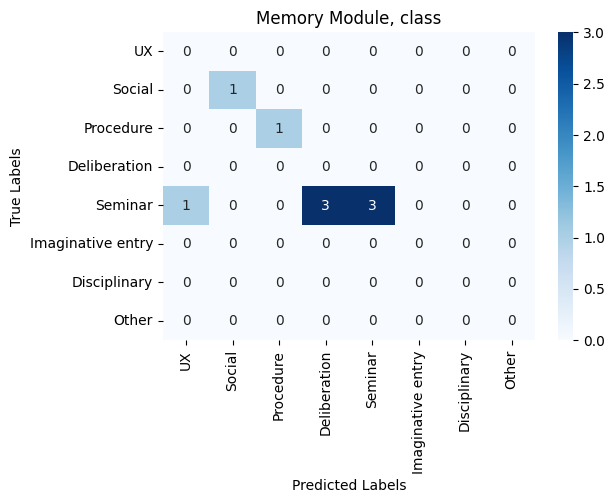

In [62]:
# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"])

# Create a heatmap using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"], yticklabels=["UX", "Social", "Procedure", "Deliberation", "Seminar", "Imaginative entry", "Disciplinary", "Other"])

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Memory Module, class")

# Show the plot
plt.show()